# 1. Classification

In [1]:
# Import modules
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
digits = datasets.load_digits()

In [2]:
# Create data and label arrays
X = digits.data
y = digits.target

# Split into training and test set with 20% of data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

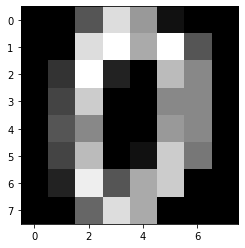

In [3]:
plt.imshow(X[0].reshape((8, 8)), cmap='gray')

# KNN

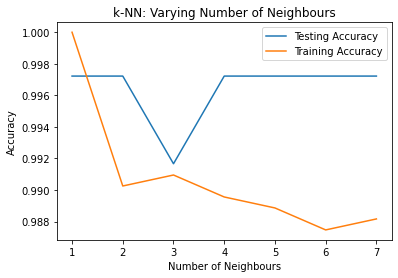

In [4]:
#kNN Classifier
#define empty lists to store scores of knn
number_neighbors = []
testing_scores = []
training_scores = []

#for loop for 8 times as the number of neighbours
for num in range (1, 8):
    #initialise knn classifier as current neighbour number 
    kNN = KNeighborsClassifier(n_neighbors=num)
    #fit classifier to training data
    kNN.fit(X_train, y_train)
    #calculate training and testing accuracy of model
    train_score = kNN.score(X_train, y_train)
    test_score = kNN.score(X_test, y_test)
    
    #append score and number to lists
    number_neighbors.append(num)
    training_scores.append(train_score)
    testing_scores.append(test_score)

#plot testing vs training scores/accuracy
plt.plot(number_neighbors, testing_scores, label="Testing Accuracy")
plt.plot(number_neighbors, training_scores, label="Training Accuracy")
plt.title("k-NN: Varying Number of Neighbours")
plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbours")
plt.legend()

In [5]:
#create dictionary for variance between test and training scores
variance = {}
for i in range(len(number_neighbors)):
    #get test, train, and k number
    num = number_neighbors[i]
    test = testing_scores[i]
    train = training_scores[i]
    #set variance as absolute value between test and training
    variance[num] = abs(test - train)

#sort dictionary by value ascending
sorted_variance = {k: v for k, v in sorted(variance.items(), key=lambda item: item[1])}

print("For this training and test data split and accuracies, the following is the best to worst K number of neighbours based on variance and not highest test score:")
for k, score in sorted_variance.items():
    print("K = ", k)

best_k = next(iter(sorted_variance))
print("\nThe best K value is:", best_k)

For this training and test data split and accuracies, the following is the best to worst K number of neighbours based on variance and not highest test score:
K =  3
K =  1
K =  2
K =  4
K =  5
K =  7
K =  6

The best K value is: 3


For each time the program is run, the test and training data re-shuffles and will redo the training and testing. Therefore, the accuracy scores for each number of neighbours will change. The best K value will vary due to this. Although, to identify the best K value, it is ideal to avoid overfitting and underfitting data. Overfitted data occurs when training accuracy is high and test accuracy is low, as it performs well on the trained data but not testing. Overfitting tends to occur with lower k values. Underfitting is when both the training and testing accuracy is low, suggesting the module is too simple and cannot identify underlying patterns in the data. The ideal value is high test accuracy, and the accuracy of test and training scores being very close. A small variance in training and test data for a K value indicates a well generalised model. Stability is also important, where the testing accuracy is stable meaning the model is not overly sensitive to K variations. Overall, the best K value is where the testing and training accuracy is very close, and preferably higher.  

# Kernels

In [6]:
#list of types of SVM/SVC Classifier
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernal_report = {}

#iterate through each kernel of the support vector machine
for kernel in kernels:
    #set kernel
    svm = SVC(kernel=kernel)
    #fit model to training data
    svm.fit(X_train, y_train)
    #predict class from test data
    y_pred = svm.predict(X_test)
    #print kernel and classification model performance
    print(kernel)
    print(classification_report(y_test, y_pred))
    #append to dictionary for kernal and kernal report results
    report = classification_report(y_test, y_pred, output_dict=True)
    kernal_report[kernel] = {
        #store accuracy, macro average, and weighted average scores
        "Accuracy": report['accuracy'],
        "Macro Avg.": report['macro avg'],
        "Weighted Avg.": report['weighted avg']
    }

linear
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.98      0.98      0.98        41
           2       1.00      1.00      1.00        45
           3       0.97      1.00      0.99        37
           4       0.98      1.00      0.99        40
           5       1.00      1.00      1.00        34
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        37
           8       1.00      0.94      0.97        36
           9       1.00      1.00      1.00        31

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

poly
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        45
           3

In [7]:
#print the accuracy, macro average, and weighted average of each kernal
for key, val in kernal_report.items():
    print("Kernel: ", key)
    for typ, score in val.items():
        print(typ)
        if isinstance(score, dict):
            for x, y in score.items():
                print(x, " : ", y)
        else:
            print(score)
    print("\n")


Kernel:  linear
Accuracy
0.9916666666666667
Macro Avg.
precision  :  0.9924903722721439
recall  :  0.9920054200542004
f1-score  :  0.9921359315180454
support  :  360
Weighted Avg.
precision  :  0.9918075167593783
recall  :  0.9916666666666667
f1-score  :  0.9916229668822262
support  :  360


Kernel:  poly
Accuracy
0.9972222222222222
Macro Avg.
precision  :  0.9973684210526315
recall  :  0.9972972972972972
f1-score  :  0.997296803652968
support  :  360
Weighted Avg.
precision  :  0.997295321637427
recall  :  0.9972222222222222
f1-score  :  0.9972217148655504
support  :  360


Kernel:  rbf
Accuracy
1.0
Macro Avg.
precision  :  1.0
recall  :  1.0
f1-score  :  1.0
support  :  360
Weighted Avg.
precision  :  1.0
recall  :  1.0
f1-score  :  1.0
support  :  360


Kernel:  sigmoid
Accuracy
0.9111111111111111
Macro Avg.
precision  :  0.9153832180733344
recall  :  0.9169866424252735
f1-score  :  0.9144154199761377
support  :  360
Weighted Avg.
precision  :  0.915142605533521
recall  :  0.9111111

In [8]:
#sort kernal based on accuracy from best to worst performing
sorted_kernal_report = sorted(kernal_report.items(), key=lambda x: x[1]['Accuracy'], reverse=True)

#print best to worst kernals
print("The best kernal(s) based on accuracy is from best to worst is: ")
for kernel, metrics in sorted_kernal_report:
    print(f"Kernel: {kernel}, Accuracy: {round(metrics['Accuracy'], 4)}")

best_kernel = sorted_kernal_report[0][0]
print("\nThe best kernal is: ", best_kernel)

The best kernal(s) based on accuracy is from best to worst is: 
Kernel: rbf, Accuracy: 1.0
Kernel: poly, Accuracy: 0.9972
Kernel: linear, Accuracy: 0.9917
Kernel: sigmoid, Accuracy: 0.9111

The best kernal is:  rbf


As previously mentioned, the accuracy of the model will vary as each run of the program will shuffle the data and reset the training and test models. Therefore, the kernels have been ordered from best accuracy to worst accuracy, based on accuracy alone as shown above. Therefore, the best kernal should be used and if there are multiple with identical scores, any of these kernals with highest scores should be used.

# Naive Bayes

Training Score:  0.8169798190675017
Testing Score:  0.7972222222222223


Text(33.0, 0.5, 'True label')

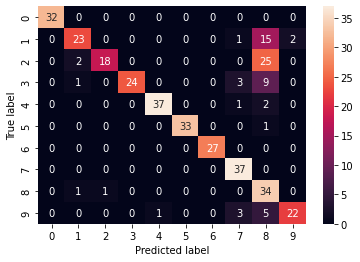

In [9]:
# Naive Bayes
#initialise model
bayes = GaussianNB()
#fit training data to model
bayes.fit(X_train, y_train)
#predict using model with test data
y_pred = bayes.predict(X_test)

#find accuracy of model with test and training set
bayes_score_test = bayes.score(X_test, y_test)
bayes_score_train = bayes.score(X_train, y_train)
print("Training Score: ", bayes_score_train)
print("Testing Score: ", bayes_score_test)

#generate confusion matrix of performance of test data model
conf_matrix = confusion_matrix(y_test, y_pred)
#set heatmap of confusion matrix
ax = sns.heatmap(conf_matrix, annot=True)
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

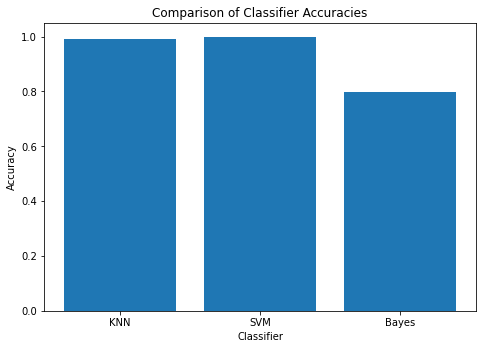

In [10]:
# Compare the accuracy of different classifiers in the same plot.
# scores = []
# labels = ["KNN", "SVM", "Bayes"]
classif_scores = {
    "KNN" : None,
    "SVM" : None,
    "Bayes" : None
}
#set classifiersd based on previously found best K for kNN and best kernal for SVC
classifiers = {
    "KNN" : KNeighborsClassifier(n_neighbors=best_k), 
    "SVM" : SVC(kernel=best_kernel), 
    "Bayes" : GaussianNB()
}

#for each classifier in the list of above classifier
for name, classifier in classifiers.items():
    #fit training data
    classifier.fit(X_train, y_train)
    #append classifier accuracy score to scores lift
    classif_scores[name] = classifier.score(X_test, y_test)
    #scores.append(classifier.score(X_test, y_test))

#plot accuracy of each classifier in same plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(classif_scores.keys(), classif_scores.values())
ax.set_xlabel("Classifier")
ax.set_ylabel("Accuracy")
ax.set_title("Comparison of Classifier Accuracies")
plt.show()

In [11]:
sorted_classif_scores = dict(sorted(classif_scores.items(), key=lambda item: item[1], reverse=True))
best_classifier = next(iter(sorted_classif_scores))

print("The best classifier based on accuracy is: ", best_classifier, "with", round(float(classif_scores[best_classifier])*100, 4), "% accuracy score.")

The best classifier based on accuracy is:  SVM with 100.0 % accuracy score.


# 2. Regression

In [12]:
# Load gapminder
df = pd.read_csv("gapminder.csv")
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


<AxesSubplot:>

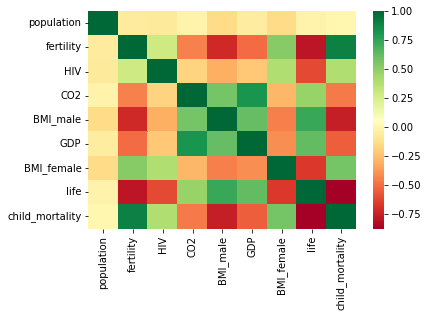

In [13]:
# Heatmap
sns.heatmap(df.corr(), cmap="RdYlGn")

c:\Users\61406\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
c:\Users\61406\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
c:\Users\61406\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':


Text(0, 0.5, 'Life Expectency')

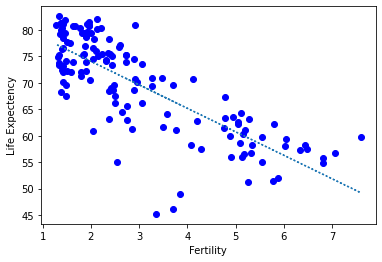

In [14]:
#linear Regression of ferticility vs life expectancy
x = df["fertility"]
y = df["life"]

#define regression model
regression = LinearRegression()
#fit model top data
regression.fit(x[:, None], y)
one_feat_score = regression.score(x[:, None], y)

#plot regression model
fig, ax = plt.plot(x, y, 'bo', x, regression.predict(x[:, None]), ":")
plt.xlabel("Fertility")
plt.ylabel("Life Expectency")

In [15]:
# Linear regression on all
X = df[["fertility", "HIV", "CO2", "BMI_male", "GDP", "BMI_female", "child_mortality"]]
y = df["life"]

regression_all = LinearRegression()
regression_all.fit(X,y)
all_feat_score = regression_all.score(X,y)

print("One Feature Score: ", one_feat_score)
print("All Feature Score: ", all_feat_score)

One Feature Score:  0.6192442167740038
All Feature Score:  0.8974995317332959


Evidently, the model score is better when using all features. This can be for several reasons within the data. 

In [16]:
#determine 5-fold cross validation score
print(cross_val_score(regression, x[:, None], y, cv=5))
print(cross_val_score(regression_all, X, y, cv=5))

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
[0.81621881 0.8322471  0.90868335 0.81325568 0.94404223]


c:\Users\61406\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


Evidently, for the 5-fold cross validation score, the regression model with all features is higher in each fold score. The cross validation score for each fold is noticably high for all features, with [0.81621881 0.8322471  0.90868335 0.81325568 0.94404223] and the single feature scores being [0.71001079 0.75007717 0.55271526 0.547501   0.52410561].

# Logistic Regression

In [17]:
# Load creditcard
df = pd.read_csv("creditcard.csv")
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


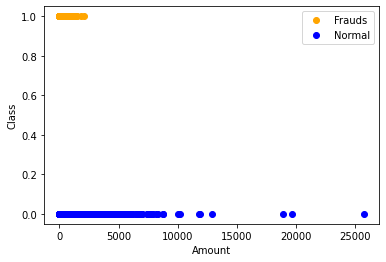

In [18]:
#class and amount comparison
#get frauds and non frauds data
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
#plot amounts column against class column for frauds and non frauds
plt.plot(frauds.Amount, frauds.Class, 'o', color="orange", label="Frauds")
plt.plot(non_frauds.Amount, non_frauds.Class, 'bo', label="Normal")
plt.xlabel("Amount")
plt.ylabel("Class")
plt.legend()

As seen in the plot, all the fraud cases occur at low amounts (orange plot) and the non-fraud amounts incur higher charges (blue plot). This reflects a reasonable assumption that frauds will have lower amounts for safety, whereas non-frauds are not cautious with the amounts.

c:\Users\61406\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Text(33.0, 0.5, 'True label')

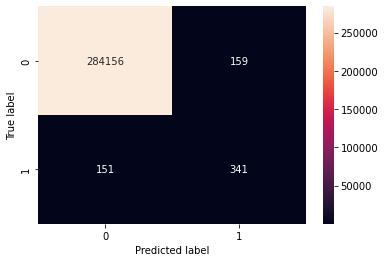

In [19]:
# Logistic Regression
X = df.drop("Class", axis=1)
y = df.Class

#set logistic regression
log_regression = LogisticRegression()
#fit data to model
log_regression.fit(X, y)
#predict model
y_pred = log_regression.predict(X)
#define confusion matrix from true data to predicted data
conf_matrix = confusion_matrix(y, y_pred)

#define heatmap to show predicted and true labels
ax = sns.heatmap(conf_matrix, annot=True, fmt='g')
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")